Training ResNet101...
Epoch 1/4
1250/1250 - 186s - loss: 1.4071 - accuracy: 0.5220 - val_loss: 1.4618 - val_accuracy: 0.6285 - 186s/epoch - 149ms/step
Epoch 2/4
1250/1250 - 109s - loss: 0.9711 - accuracy: 0.6621 - val_loss: 1.4772 - val_accuracy: 0.6706 - 109s/epoch - 87ms/step
Epoch 3/4
1250/1250 - 104s - loss: 0.8141 - accuracy: 0.7251 - val_loss: 0.9771 - val_accuracy: 0.7124 - 104s/epoch - 83ms/step
Epoch 4/4
1250/1250 - 107s - loss: 0.7264 - accuracy: 0.7498 - val_loss: 1.3776 - val_accuracy: 0.7527 - 107s/epoch - 86ms/step
ResNet101 - Training completed in 541.63 seconds
Epoch 1/4 - loss: 1.4071 - accuracy: 0.5220 - val_loss: 1.4618 - val_accuracy: 0.6285
Epoch 2/4 - loss: 0.9711 - accuracy: 0.6621 - val_loss: 1.4772 - val_accuracy: 0.6706
Epoch 3/4 - loss: 0.8141 - accuracy: 0.7251 - val_loss: 0.9771 - val_accuracy: 0.7124
Epoch 4/4 - loss: 0.7264 - accuracy: 0.7498 - val_loss: 1.3776 - val_accuracy: 0.7527
ResNet101 - Test loss: 1.4293 - Test accuracy: 0.7501
 
Training VGG19..

DenseNet121 - Test loss: 0.5668 - Test accuracy: 0.8144
 
Training MobileNetV2...
Epoch 1/4
1250/1250 - 65s - loss: 1.7236 - accuracy: 0.4035 - val_loss: 2.0165 - val_accuracy: 0.2673 - 65s/epoch - 52ms/step
Epoch 2/4
1250/1250 - 38s - loss: 1.2422 - accuracy: 0.5672 - val_loss: 1.4739 - val_accuracy: 0.5389 - 38s/epoch - 30ms/step
Epoch 3/4
1250/1250 - 38s - loss: 1.0718 - accuracy: 0.6275 - val_loss: 1.1229 - val_accuracy: 0.6560 - 38s/epoch - 30ms/step
Epoch 4/4
1250/1250 - 37s - loss: 0.9346 - accuracy: 0.6740 - val_loss: 0.9010 - val_accuracy: 0.6922 - 37s/epoch - 30ms/step
MobileNetV2 - Training completed in 180.77 seconds
Epoch 1/4 - loss: 1.7236 - accuracy: 0.4035 - val_loss: 2.0165 - val_accuracy: 0.2673
Epoch 2/4 - loss: 1.2422 - accuracy: 0.5672 - val_loss: 1.4739 - val_accuracy: 0.5389
Epoch 3/4 - loss: 1.0718 - accuracy: 0.6275 - val_loss: 1.1229 - val_accuracy: 0.6560
Epoch 4/4 - loss: 0.9346 - accuracy: 0.6740 - val_loss: 0.9010 - val_accuracy: 0.6922
MobileNetV2 - Test 

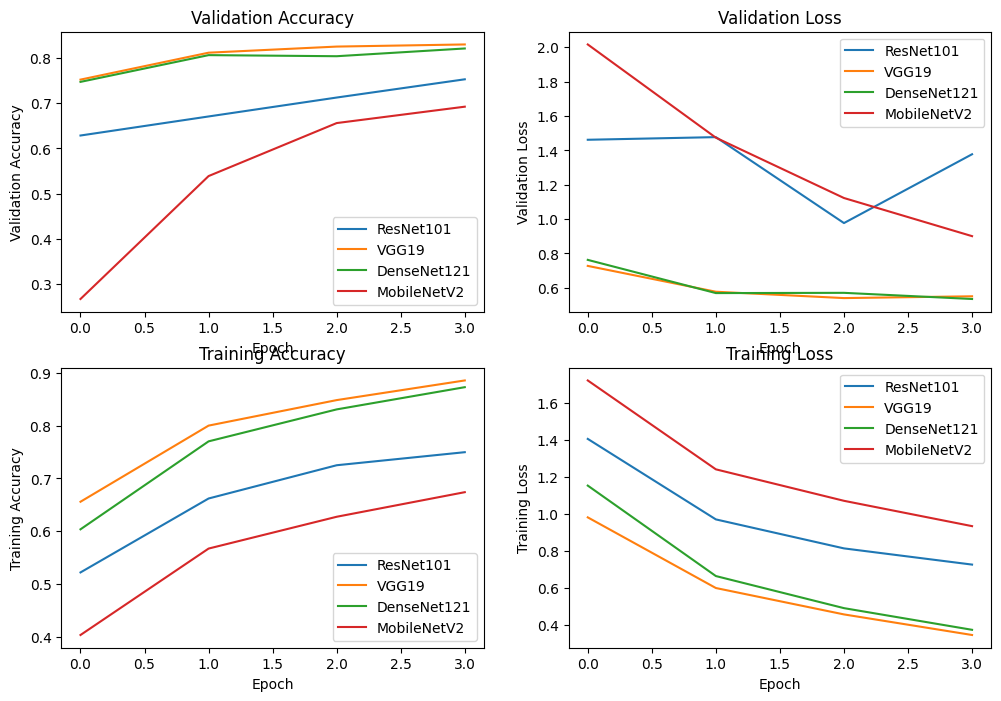

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.applications import ResNet101, VGG19, DenseNet121, MobileNetV2
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize and preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define a function to create and compile a CNN model
def create_cnn_model(model_name, custom_learning_rate):
    if model_name == 'ResNet101':
        base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    elif model_name == 'VGG19':
        base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    elif model_name == 'DenseNet121':
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    elif model_name == 'MobileNetV2':
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    else:
        raise ValueError("Invalid model name")

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=custom_learning_rate), metrics=['accuracy'])
    return model

# Create and train models for each architecture
model_names = ['ResNet101', 'VGG19', 'DenseNet121', 'MobileNetV2']
models = {}
model_histories = {}

# Track start and end times for training
start_times = {}
end_times = {}


custom_learning_rate = 0.0001
epochs = 4

for model_name in model_names:
    model = create_cnn_model(model_name, custom_learning_rate)
    print(f"Training {model_name}...")

    start_times[model_name] = time.time()  # Record start time

    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), verbose=2)

    end_times[model_name] = time.time()  # Record end time

    models[model_name] = model
    model_histories[model_name] = history

    print(f"{model_name} - Training completed in {end_times[model_name] - start_times[model_name]:.2f} seconds")

    for epoch in range(1, epochs + 1):
        print(f"Epoch {epoch}/{epochs} - "
              f"loss: {history.history['loss'][epoch - 1]:.4f} - "
              f"accuracy: {history.history['accuracy'][epoch - 1]:.4f} - "
              f"val_loss: {history.history['val_loss'][epoch - 1]:.4f} - "
              f"val_accuracy: {history.history['val_accuracy'][epoch - 1]:.4f}")

    # Evaluate the model on the test set
    score = model.evaluate(x_test, y_test, verbose=0)
    print(f'{model_name} - Test loss: {score[0]:.4f} - Test accuracy: {score[1]:.4f}')
    print(' ')

total_runtime = sum(end_times[model_name] - start_times[model_name] for model_name in model_names)
print(f"Total training runtime for all models: {total_runtime:.2f} seconds")

# Plot performance graphs
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for model_name in model_names:
    history = model_histories[model_name]
    plt.plot(history.history['val_accuracy'], label=f'{model_name}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
for model_name in model_names:
    history = model_histories[model_name]
    plt.plot(history.history['val_loss'], label=f'{model_name}')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss')
plt.legend()

plt.subplot(2, 2, 3)
for model_name in model_names:
    history = model_histories[model_name]
    plt.plot(history.history['accuracy'], label=f'{model_name}')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
for model_name in model_names:
    history = model_histories[model_name]
    plt.plot(history.history['loss'], label=f'{model_name}')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss')
plt.legend()

plt.show()
